Problem Statement
The goal of this project is to predict the median housing price (MEDV) in various areas of Boston using features such as crime rate, average number of rooms per dwelling, accessibility to highways, etc.



Importing libraries:
Imports libraries for data handling: pandas and numpy.

Includes machine learning models: Linear Regression, KNN, and Random Forest.

Preprocesses data using StandardScaler for scaling features.

Splits data into training and testing sets with train_test_split.

Evaluates model performance using metrics like MSE and R² Score.

Visualizes data and results using matplotlib and seaborn.

Sets up a pipeline to predict house prices based on input features.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('HousingDataSet.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

Provides an overview of the dataset, including column names, data types, and non-null values.
Helps identify missing data or incorrect data types.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Displays summary statistics for numerical columns (e.g., mean, median, min, max).

Helps understand the distribution and range of numerical features.

In [9]:
#print("Summary statistics:")
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATA CLEANING AND PREPROCESSING**

It identifys which columns have missing data and how many values are missing. It’s an essential step in data preprocessing, as missing values need to be handled (e.g., by filling or removing them) before training machine learning models.

In [12]:
df.isnull().sum()
#2 missing values in sqft_above       

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Handling Missing values in sqft_above**

In [14]:
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].mean())

In [16]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

axis=1 specifies that you are dropping columns (not rows).
**Purpose**
id: Likely a unique identifier for each row, which is irrelevant for prediction as it doesn’t provide useful information.

date: Typically not helpful in its raw form unless transformed into meaningful features (e.g., year or month).

By dropping irrelevant columns, you simplify the dataset and focus only on features that contribute to predicting house prices.

In [25]:
# Drop irrelevant columns
df = df.drop(['id', 'date'], axis=1)

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

X = df.drop('price', axis=1)

Creates a new DataFrame X by removing the price column from df.

X contains all the independent variables (features) that will be used to predict the target variable (price).

axis=1 specifies that you are dropping a column.

y = df['price']

Extracts the price column from df and assigns it to y.

y is the target variable (dependent variable) that the model will learn to predict.

**Purpose**
This step separates the dataset into:

Features (X): The input variables used for prediction (e.g., size, bedrooms, location).

Target (y): The output variable that you want to predict (house price).

This is an essential step before training a machine learning model.

**Result**
X: Contains all columns except price.

y: Contains only the price column.

This separation prepares the data for training and testing machine learning models.

In [30]:
#  Feature Selection (Correlation with Price)
X = df.drop('price', axis=1)
y = df['price']

In [32]:
# Calculate Correlation Matrix
correlation_matrix = df.corr()

# 3.2 Display Correlation with Target Variable
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with Price:\n", correlation_with_price)


Correlation with Price:
 price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605565
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


**SLIDE 6-Visualization: Heatmap of the correlation matrix of the original features, highlighting highly correlated pairs.**

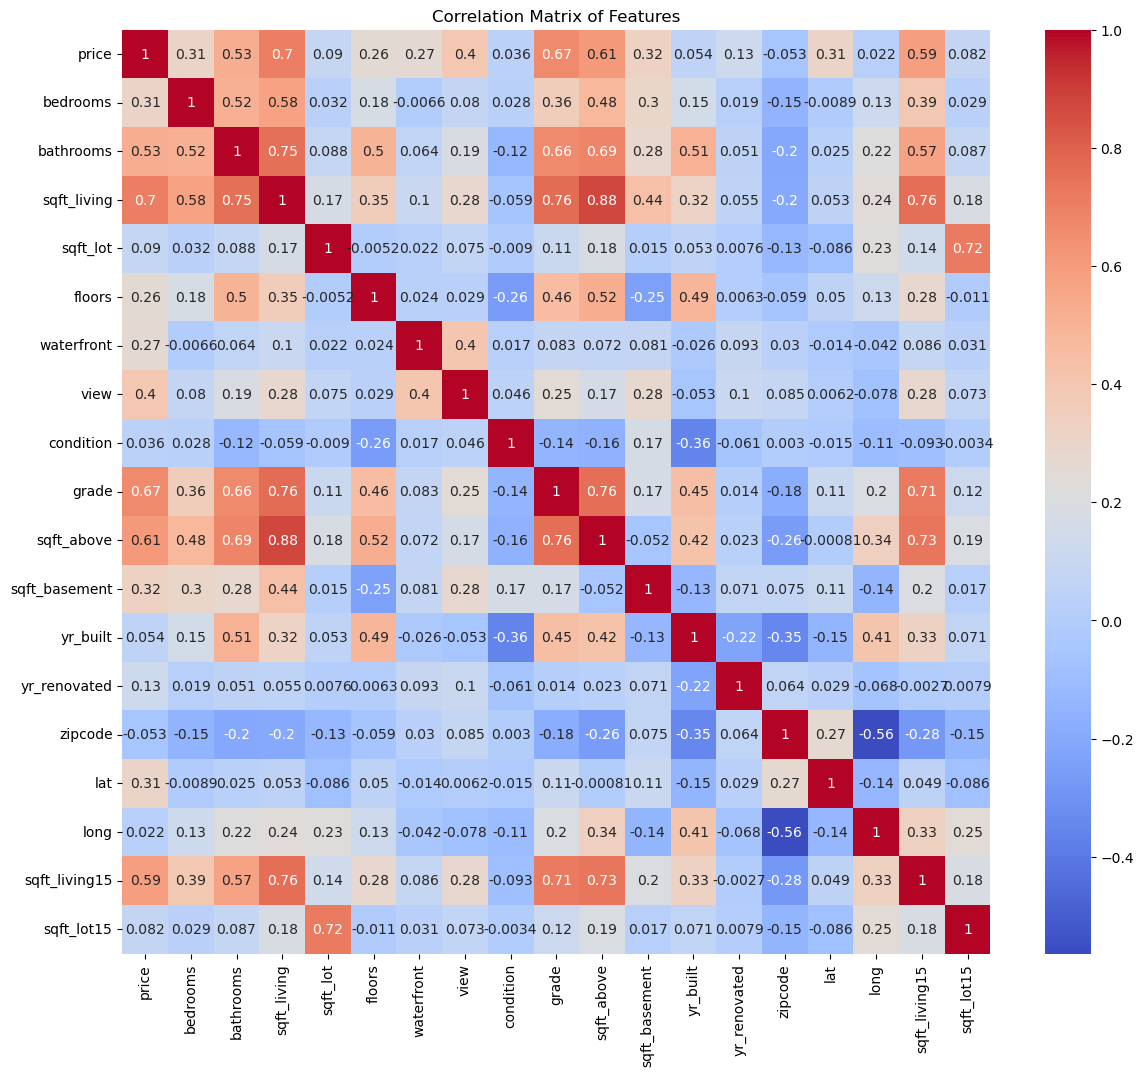

In [35]:
# Plot Correlation Matrix (Heatmap)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

In [36]:
# Select Top Features Based on Correlation (4-6 features)
top_features = correlation_with_price[1:7].index.tolist()  # Select 4-6 features (excluding 'price' itself)
print("Top Features (Based on Correlation with Price):\n", top_features)

Top Features (Based on Correlation with Price):
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']


**MODEL DEVELOPMENT**

Setting random_state=42 makes sure the data is split the same way every time you run the code. This helps in getting consistent results and makes debugging easier. The number 42 is just a common choice, but you can use any number. 

test_size=0.2 means that 20% of the data is used for testing, while 80% is used for training. This helps the model learn from most of the data while keeping some aside to check how well it performs on unseen data. 

In [41]:
# Multiple Linear Regression (Using Top Features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Purpose**
Focuses the model on only the most relevant features (top_features) to improve performance and reduce complexity.

Helps avoid overfitting by removing less important or irrelevant features.

**Result**
X_train_selected: Training dataset with only the selected top features.

X_test_selected: Testing dataset with the same selected top features.

This ensures that both training and testing datasets are aligned and optimized for modeling

In [44]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

**Purpose**
To train a linear regression model that can predict house prices based on the selected features in X_train_selected.

The model learns the relationship between the input features and the target variable.

**Result**
After this step:

model_lr is trained and ready to make predictions on new data (e.g., X_test_selected).

The model can now predict house prices based on the patterns it learned during training.

In [47]:
model_lr = LinearRegression()
model_lr.fit(X_train_selected, y_train)

LinearRegression()

**Purpose**
To evaluate how well the trained model performs on unseen data (the test set).

Predictions (y_pred_lr) will later be compared to the actual house prices (y_test) using evaluation metrics.

**Result**
y_pred_lr: A list or array of predicted house prices for the test set.

These predictions will help assess the model’s accuracy and reliability.

In [50]:
y_pred_lr = model_lr.predict(X_test_selected)

Purpose
To evaluate the performance of the linear regression model using two metrics:

RMSE: Measures prediction error (lower is better).

R² Score: Indicates how well the model explains variability in house prices (closer to 1 is better).

In [53]:
# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # RMSE is the square root of MSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Linear Regression - RMSE:", round(rmse_lr, 2), "\tMAE:", round(mae_lr, 2), "\tR²:", round(r2_lr, 2))

Linear Regression - RMSE: 252245.47 	MAE: 159943.12 	R²: 0.58


The linear regression model has an RMSE of 252245.47, indicating significant prediction error, and an R² score of 0.58, showing it explains 58% of house price variance. While the model captures some patterns, its performance can be improved by using advanced models, better feature engineering, and proper data preprocessing.

In [56]:
# Predict the prices of the two houses
houses_to_predict = X_test_selected.iloc[:2] #select the first 2 houses
y_pred_houses = model_lr.predict(houses_to_predict)
print("Predicted price for the 1 house using Linear Regression:",y_pred_houses[0])
print("Predicted price for the 2 house using Linear Regression:",y_pred_houses[1])

Predicted price for the 1 house using Linear Regression: 536168.2909938782
Predicted price for the 2 house using Linear Regression: 700329.2498413699


KNN

This code implements K-Nearest Neighbors (KNN) Regression to find the best number of neighbors (k) by testing values from 1 to 20. It scales the training and test data using StandardScaler to ensure all features contribute equally. For each value of k, it trains a KNN model, predicts house prices on the test set, calculates the Root Mean Squared Error (RMSE), and stores the RMSE in a list (rmse_values). The goal is to identify the k value with the lowest RMSE, which gives the best model performance.

optimal_k = 5

Sets the optimal number of neighbors (k) to 5, based on visual inspection of the RMSE vs. K plot.

Looking at the plot, the RMSE appears to be at or near its minimum value when K is 5.

knn = KNeighborsRegressor(n_neighbors=optimal_k)

Creates a new KNN Regression model (knn) using the selected optimal value of k (5 neighbors).

knn.fit(X_train_scaled, y_train)

Trains the KNN Regression model (knn) on the scaled training data (X_train_scaled) and the corresponding target variable (y_train).

The model learns the relationships between the features and target variable in the training data, using 5 neighbors for prediction.

Purpose
To use the visual inspection of the plot to select the best number of neighbors, then create and train a KNN regression model.

This configuration should provide better performance because it uses a good balance of bias and variance.

In [61]:
scaler = StandardScaler()

# 2. Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Train KNN for K=5
k5 = 5
knn_5 = KNeighborsRegressor(n_neighbors=k5)
knn_5.fit(X_train_scaled, y_train)
y_pred_knn_5 = knn_5.predict(scaler.transform(X_test))

# Evaluate K=5
rmse_knn_5 = np.sqrt(mean_squared_error(y_test, y_pred_knn_5))
mae_knn_5 = mean_absolute_error(y_test, y_pred_knn_5)
r2_knn_5 = r2_score(y_test, y_pred_knn_5)

In [64]:
# Train KNN for K=10
k10 = 10
knn_10 = KNeighborsRegressor(n_neighbors=k10)
knn_10.fit(X_train_scaled, y_train)
y_pred_knn_10 = knn_10.predict(scaler.transform(X_test))

# Evaluate K=10
rmse_knn_10 = np.sqrt(mean_squared_error(y_test, y_pred_knn_10))
mae_knn_10 = mean_absolute_error(y_test, y_pred_knn_10)
r2_knn_10 = r2_score(y_test, y_pred_knn_10)


The best K based on R² (higher is better) and RMSE (lower is better)

In [68]:
# Print results
print("\nKNN Model Comparison:", "\n")

print('K=5',     "RMSE=", rmse_knn_5,     "MAE=", mae_knn_5,     "R²=", r2_knn_5,"\n")
print('K=10',    "RMSE=", rmse_knn_10,    "MAE=", mae_knn_10,    "R²=",r2_knn_10)


KNN Model Comparison: 

K=5 RMSE= 182430.95278005456 MAE= 93150.9840388619 R²= 0.7798533118269408 

K=10 RMSE= 182527.85344443217 MAE= 93355.12308582004 R²= 0.7796193819427301


In [70]:
# best K based on highest R² and lowest RMSE is k5

optimal_k = k5

# Train the final model with the best K
knn_final = KNeighborsRegressor(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Use this final model for predictions
y_pred_final = knn_final.predict(scaler.transform(X_test))


In [72]:
# Select the same 2 houses to predict with KNN
houses_to_predict_knn = X_test.iloc[:2]

# Scale the 2 houses with the same scaler
houses_to_predict_scaled = scaler.transform(houses_to_predict_knn)

# Predict the 2 houses using the final model with optimal K
y_pred_knn_houses = knn_final.predict(houses_to_predict_scaled)

# Print predicted prices for the 2 houses
print("Predicted price for the 1st house using KNN Regression:", y_pred_knn_houses[0])
print("Predicted price for the 2nd house using KNN Regression:", y_pred_knn_houses[1])


Predicted price for the 1st house using KNN Regression: 404230.0
Predicted price for the 2nd house using KNN Regression: 707590.0


rf = RandomForestRegressor(n_estimators=100, random_state=42)

Creates an instance of the Random Forest Regressor model.

n_estimators=100: Specifies that the Random Forest will consist of 100 decision trees. More trees generally lead to better performance, but also increased computational cost.

random_state=42: Sets a seed for the random number generator to ensure reproducibility. Using the same random_state will yield the same results each time the code is run.

rf.fit(X_train, y_train)

Trains (fits) the Random Forest model using the training data:

X_train: The features (independent variables) from the training set.

y_train: The target variable (house prices) from the training set.

During training, the model learns the relationships between the input features and the target variable by building multiple decision trees on different subsets of the data and features.

Purpose
To train a Random Forest regression model to predict house prices based on the features in X_train.

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions, which often results in better accuracy and robustness compared to a single decision tree.

By setting random_state, you ensure that the model's training process is reproducible, allowing you to obtain consistent results across multiple runs.

In [75]:
# Extra Algo 
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [77]:
# Evaluate Random Forest performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest = RMSE:", round(rmse_rf, 2), "\tMAE:", round(mae_rf, 2), "\tR²:", round(r2_rf, 2))

Random Forest = RMSE: 148550.57 	MAE: 72745.09 	R²: 0.85


In [78]:
# Model Comparison (Simplified Output)
print("\nModel Comparison: \n")



print("Linear Regression", "RMSE=", rmse_lr, "\tMAE=", mae_lr, "\tR²=", r2_lr)
print("KNN Regression \t", "RMSE=",rmse_knn_5, "\tMAE=", mae_knn_5, "\t\tR²=", r2_knn_5)
print("Random Forest \t", "RMSE=",rmse_rf, "\tMAE=", mae_rf , "\t\tR²=", r2_rf)



Model Comparison: 

Linear Regression RMSE= 252245.46859993582 	MAE= 159943.11940871767 	R²= 0.5791165485786295
KNN Regression 	 RMSE= 182430.95278005456 	MAE= 93150.9840388619 		R²= 0.7798533118269408
Random Forest 	 RMSE= 148550.57231092112 	MAE= 72745.08543675028 		R²= 0.8540299481020011


Interpretation
Performance: The Random Forest model outperforms both KNN and Linear Regression, as it has the lowest RMSE and highest R2 score. KNN performs better than Linear Regression.

RMSE: The lower the RMSE, the better the model's predictive accuracy. Random Forest has the lowest RMSE, indicating it has the smallest prediction error.

R2: The higher the R2, the better the model explains the variance in the target variable. Random Forest explains 85.4% of the variance, which is the highest among the three models.

Model Selection: If you want to prioritize accuracy and the ability to explain variance in the data, Random Forest is the best choice among these three.

Based on the model comparison results you provided:

Random Forest is the best-performing model.

Here's why:

Lowest RMSE (148550.57): This indicates the lowest average prediction error compared to Linear Regression and KNN Regression.

Highest R2 Score (0.854): This shows that Random Forest explains a larger proportion of the variance in the house prices compared to the other two models.



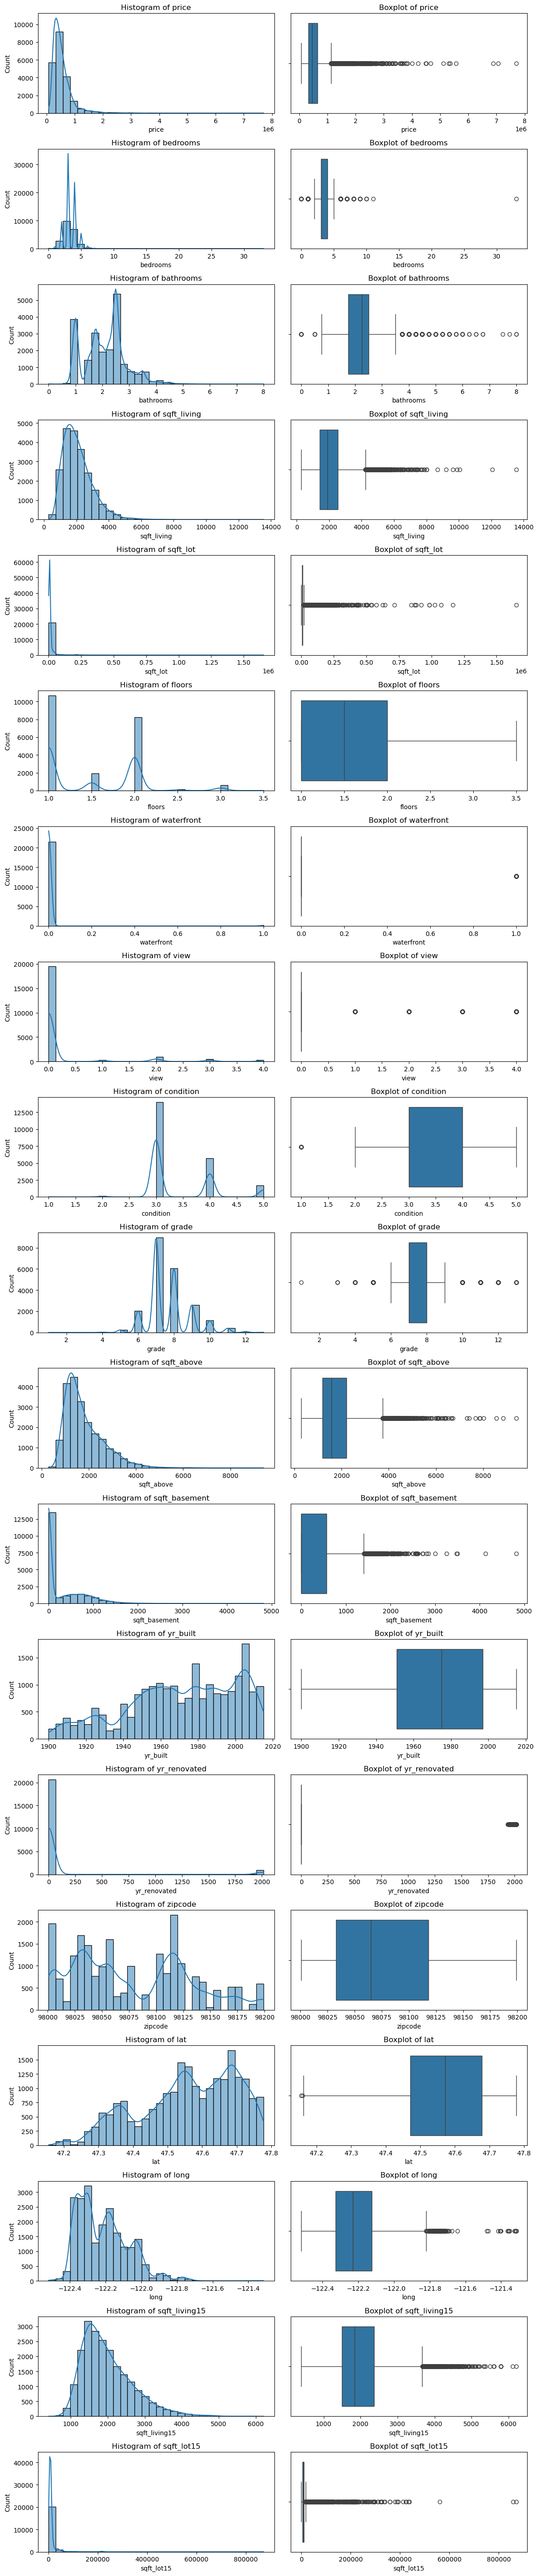

In [81]:

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create subplots for histograms and boxplots
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


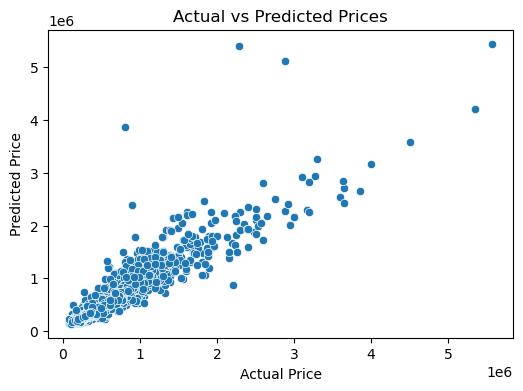

In [91]:
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()
